In [68]:
import os
import pandas as pd
import numpy as np
import scipy as sp
from scipy import optimize
import matplotlib.pyplot as plt

from lmfit import Model

In [71]:
freq = pd.read_excel("data/AnalyzedDataFFT_Run_397_sliced.xlsx",sheet_name=1)

In [76]:
for col in freq.columns[1:]:
    print(freq[col])

0       1.035200e+10
1       1.035200e+10
2       1.035200e+10
3       1.035200e+10
4       1.035200e+10
            ...     
3067    1.035400e+10
3068    1.035400e+10
3069    1.035400e+10
3070    1.035400e+10
3071    1.035400e+10
Name: 1, Length: 3072, dtype: float64


In [77]:
def load_dataset(path_folder,verbose=True):
    #path='./db/' # dove sono i file excel
    files = os.listdir(path_folder)
    i = 0
    
    if verbose:
        print('File caricati:')
    
    for file in files:
        if verbose:
            print(file)
        file = path_folder + file
        meta = pd.read_excel(file,sheet_name=0,header=None)
        freq = pd.read_excel(file,sheet_name=1)
        fft = pd.read_excel(file,sheet_name=2)
        
        if i==0:
            a=np.array([meta.iloc[0,1],meta.iloc[3,1]])
            info = pd.DataFrame([a],columns=['run','cavfreq']) # -> Qui tengo le frequenze di cavità 
        
            data = pd.DataFrame({'freq':freq[1],'fft0_0':fft[1]}) # -> Qui frequenze e fft
            
        else:
            info.loc[len(info)]=list([meta.iloc[0,1],meta.iloc[3,1]])
            
            columns=fft.columns
            
            j=0
            for column in columns[1:]:
                colname = 'fft' + str(i)+"_"+str(j)
                j+=1
                data[colname]=fft[column]
            
        i += 1
        
        
    info['run'] = pd.to_numeric(info['run'],downcast='integer')
    return data,info

In [78]:
data, info = load_dataset('data/')
data

File caricati:
AnalyzedDataFFT_Run_397_sliced.xlsx
AnalyzedDataFFT_Run_392_sliced.xlsx
AnalyzedDataFFT_Run_413_sliced.xlsx
AnalyzedDataFFT_Run_394_sliced.xlsx
AnalyzedDataFFT_Run_415_sliced.xlsx
AnalyzedDataFFT_Run_409_sliced.xlsx
AnalyzedDataFFT_Run_407_sliced.xlsx
AnalyzedDataFFT_Run_395_sliced.xlsx
AnalyzedDataFFT_Run_401_sliced.xlsx
AnalyzedDataFFT_Run_389_sliced.xlsx
AnalyzedDataFFT_Run_404_sliced.xlsx
AnalyzedDataFFT_Run_399_sliced.xlsx
AnalyzedDataFFT_Run_411_sliced.xlsx


,freq,fft0,fft1_0,fft2_0,fft3_0,fft4_0,fft5_0,fft6_0,fft7_0,fft7_1,...,fft8_9,fft8_10,fft8_11,fft8_12,fft8_13,fft9_0,fft10_0,fft11_0,fft11_1,fft12_0
0,1.035200e+10,0.000048,0.000048,0.000048,0.000049,0.000048,0.000049,0.000048,0.000048,0.000049,...,0.000049,0.00005,0.00005,0.000049,0.000049,0.000047,0.000049,0.000049,0.000049,0.000048
1,1.035200e+10,0.000048,0.000048,0.000048,0.000049,0.000048,0.000049,0.000048,0.000048,0.000049,...,0.000049,0.00005,0.00005,0.000049,0.000049,0.000047,0.000049,0.000049,0.000049,0.000048
2,1.035200e+10,0.000048,0.000048,0.000048,0.000049,0.000048,0.000049,0.000048,0.000048,0.000049,...,0.000049,0.00005,0.00005,0.000049,0.000049,0.000047,0.000049,0.000049,0.000049,0.000048
3,1.035200e+10,0.000048,0.000048,0.000048,0.000049,0.000048,0.000049,0.000048,0.000048,0.000049,...,0.000049,0.00005,0.00005,0.000049,0.000049,0.000047,0.000049,0.000049,0.000049,0.000048
4,1.035200e+10,0.000048,0.000048,0.000048,0.000049,0.000048,0.000049,0.000048,0.000048,0.000049,...,0.000049,0.00005,0.00005,0.000049,0.000049,0.000047,0.000049,0.000049,0.000049,0.000048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3067,1.035400e+10,0.000048,0.000048,0.000048,0.000049,0.000048,0.000049,0.000048,0.000048,0.000049,...,0.000049,0.00005,0.00005,0.000049,0.000049,0.000047,0.000049,0.000049,0.000049,0.000048
3068,1.035400e+10,0.000048,0.000048,0.000048,0.000049,0.000048,0.000049,0.000048,0.000048,0.000049,...,0.000049,0.00005,0.00005,0.000049,0.000049,0.000047,0.000049,0.000049,0.000049,0.000048
3069,1.035400e+10,0.000048,0.000048,0.000048,0.000049,0.000048,0.000049,0.000048,0.000048,0.000049,...,0.000049,0.00005,0.00005,0.000049,0.000049,0.000047,0.000049,0.000049,0.000049,0.000048
3070,1.035400e+10,0.000048,0.000048,0.000048,0.000049,0.000048,0.000049,0.000048,0.000048,0.000049,...,0.000049,0.00005,0.00005,0.000049,0.000049,0.000047,0.000049,0.000049,0.000049,0.000048


In [30]:
info

,run,cavfreq
0,397,1.035344e+10
1,392,1.035349e+10
2,413,1.035338e+10
3,394,1.035347e+10
4,415,1.035339e+10
5,409,1.035336e+10
6,407,1.035335e+10
7,395,1.035347e+10
8,401,1.035339e+10
9,389,1.035352e+10


## Fit run 397

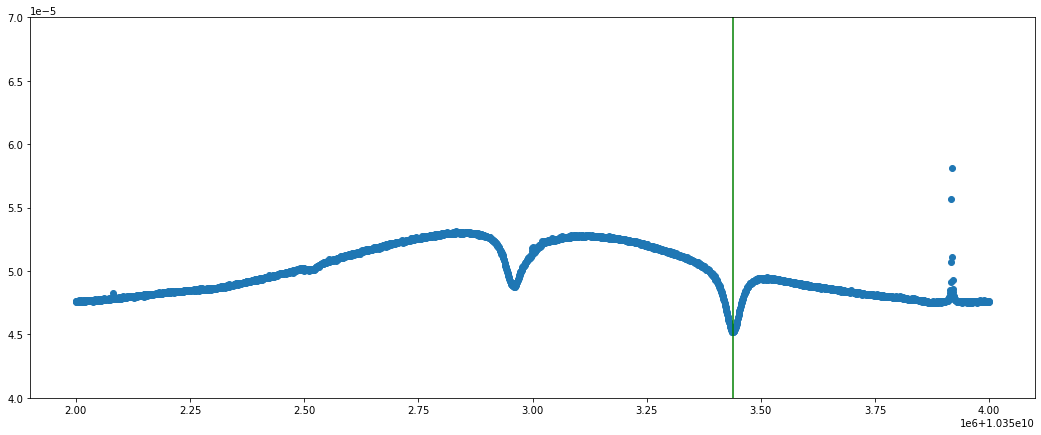

In [44]:
i=0
center = info['cavfreq'][i]

fig,ax=plt.subplots(1,1,figsize=(18,7))
ax.plot(data['freq'],data["fft{}".format(i)],'o')
ax.set_ylim([4e-5,7e-5])
ax.vlines(center,0,6,'green')
plt.show()

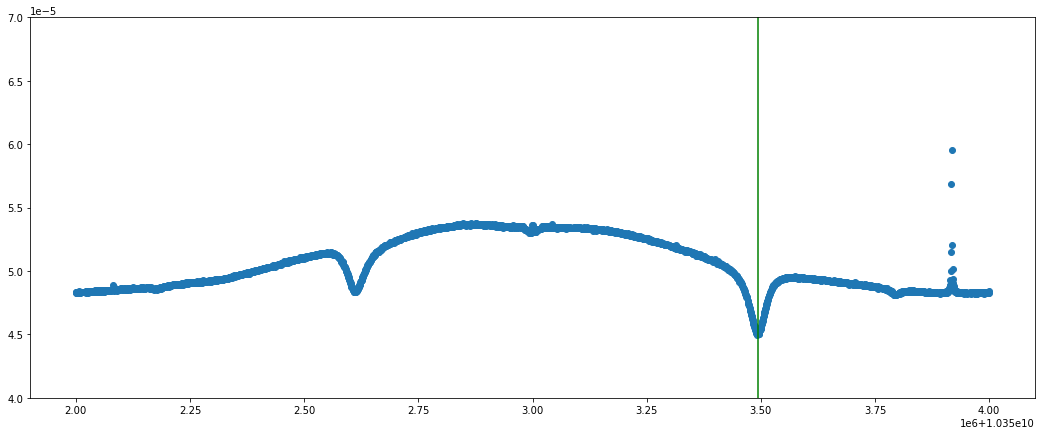

In [45]:
i=1
center = info['cavfreq'][i]

fig,ax=plt.subplots(1,1,figsize=(18,7))
ax.plot(data['freq'],data["fft{}".format(i)],'o')
ax.set_ylim([4e-5,7e-5])
ax.vlines(center,0,6,'green')
plt.show()

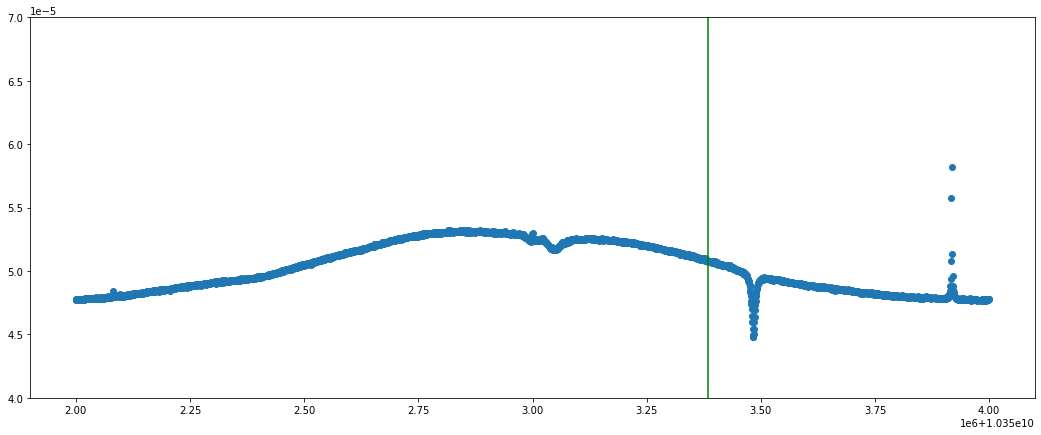

In [46]:
i=2
center = info['cavfreq'][i]

fig,ax=plt.subplots(1,1,figsize=(18,7))
ax.plot(data['freq'],data["fft{}".format(i)],'o')
ax.set_ylim([4e-5,7e-5])
ax.vlines(center,0,6,'green')
plt.show()

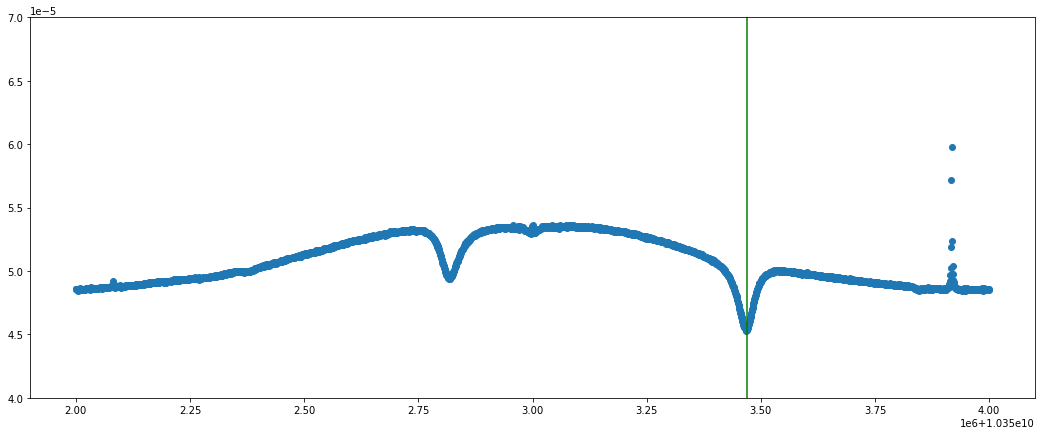

In [47]:
i=3
center = info['cavfreq'][i]

fig,ax=plt.subplots(1,1,figsize=(18,7))
ax.plot(data['freq'],data["fft{}".format(i)],'o')
ax.set_ylim([4e-5,7e-5])
ax.vlines(center,0,6,'green')
plt.show()

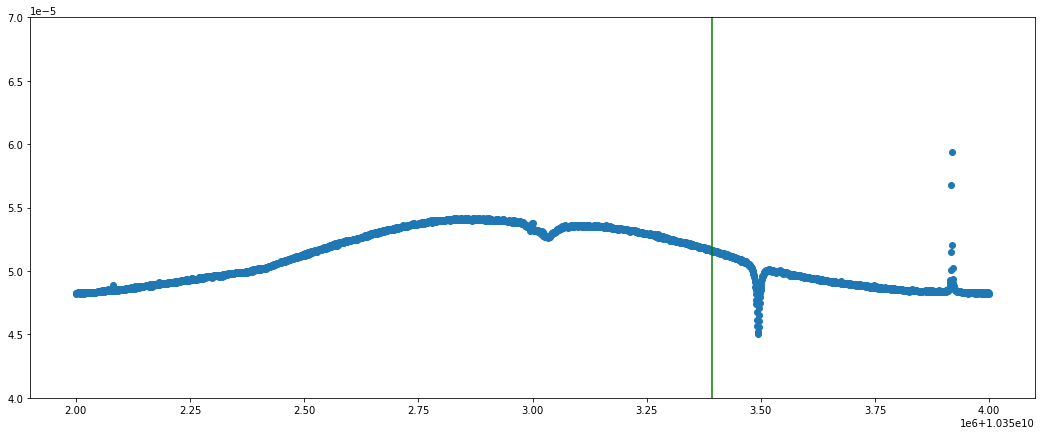

In [48]:
i=4
center = info['cavfreq'][i]

fig,ax=plt.subplots(1,1,figsize=(18,7))
ax.plot(data['freq'],data["fft{}".format(i)],'o')
ax.set_ylim([4e-5,7e-5])
ax.vlines(center,0,6,'green')
plt.show()

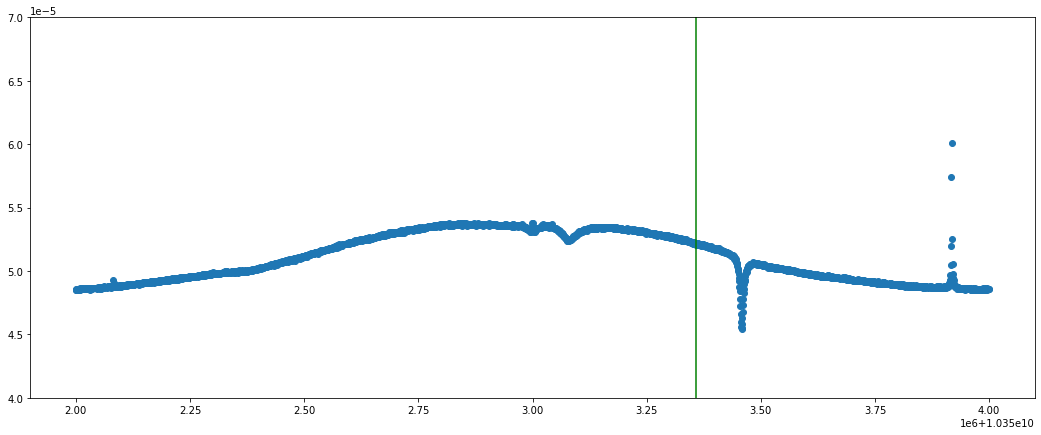

In [49]:
i=5
center = info['cavfreq'][i]

fig,ax=plt.subplots(1,1,figsize=(18,7))
ax.plot(data['freq'],data["fft{}".format(i)],'o')
ax.set_ylim([4e-5,7e-5])
ax.vlines(center,0,6,'green')
plt.show()

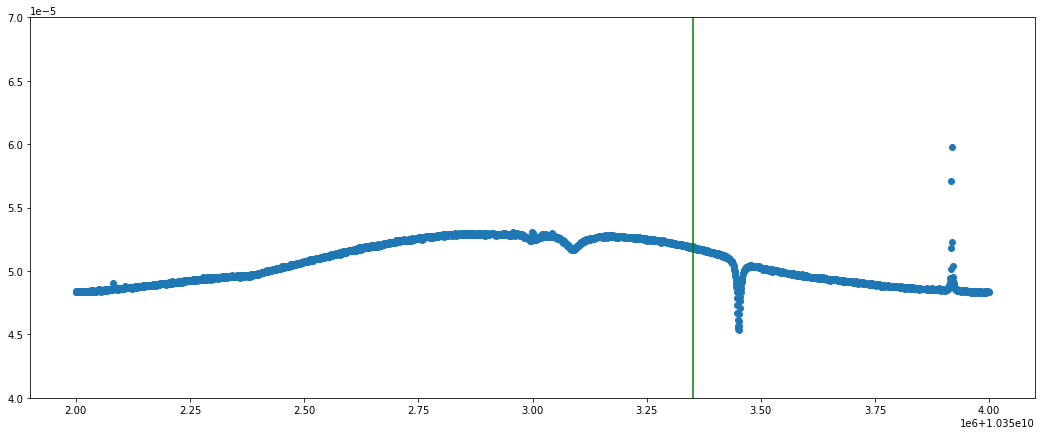

In [50]:
i=6
center = info['cavfreq'][i]

fig,ax=plt.subplots(1,1,figsize=(18,7))
ax.plot(data['freq'],data["fft{}".format(i)],'o')
ax.set_ylim([4e-5,7e-5])
ax.vlines(center,0,6,'green')
plt.show()

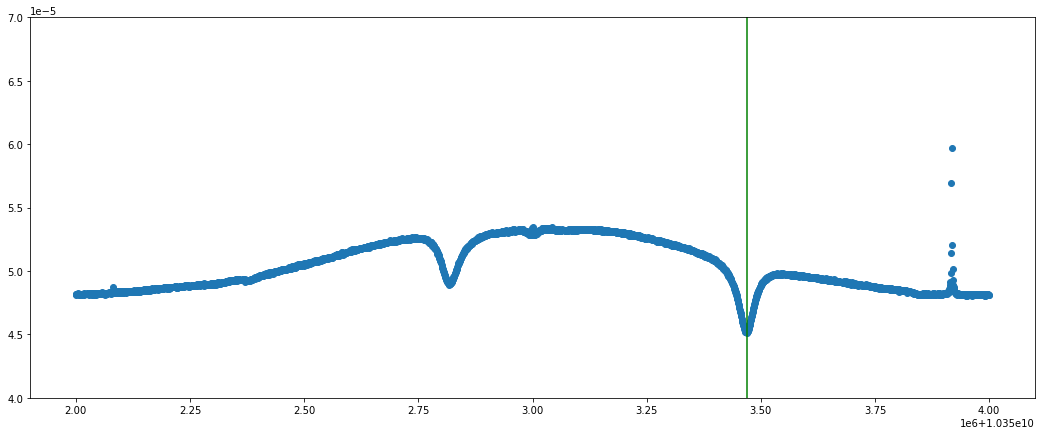

In [51]:
i=7
center = info['cavfreq'][i]

fig,ax=plt.subplots(1,1,figsize=(18,7))
ax.plot(data['freq'],data["fft{}".format(i)],'o')
ax.set_ylim([4e-5,7e-5])
ax.vlines(center,0,6,'green')
plt.show()

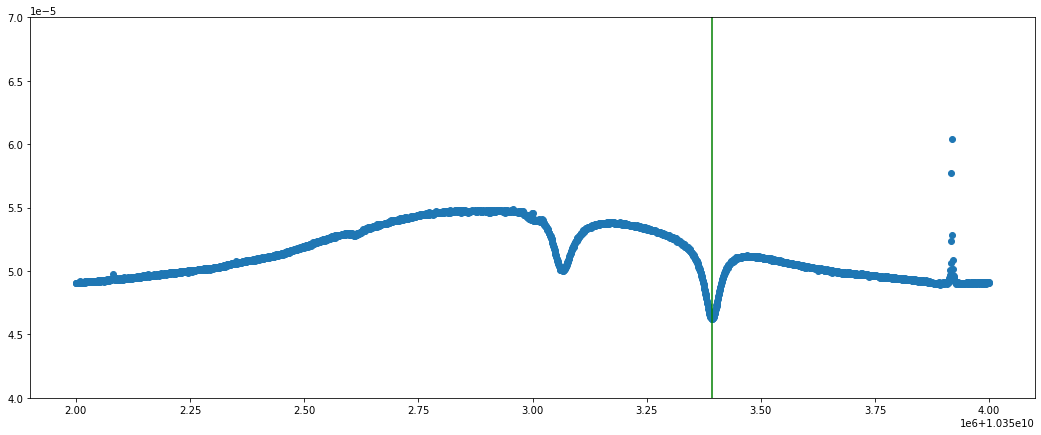

In [52]:
i=8
center = info['cavfreq'][i]

fig,ax=plt.subplots(1,1,figsize=(18,7))
ax.plot(data['freq'],data["fft{}".format(i)],'o')
ax.set_ylim([4e-5,7e-5])
ax.vlines(center,0,6,'green')
plt.show()

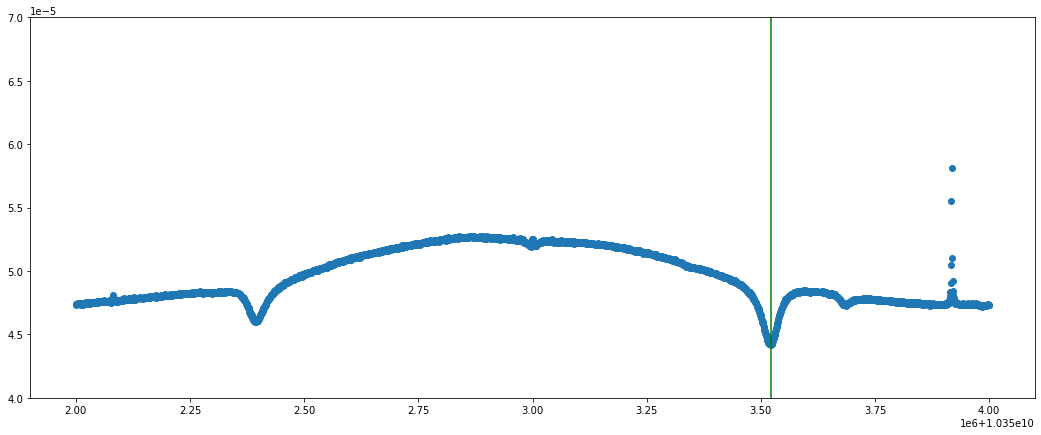

In [53]:
i=9
center = info['cavfreq'][i]

fig,ax=plt.subplots(1,1,figsize=(18,7))
ax.plot(data['freq'],data["fft{}".format(i)],'o')
ax.set_ylim([4e-5,7e-5])
ax.vlines(center,0,6,'green')
plt.show()

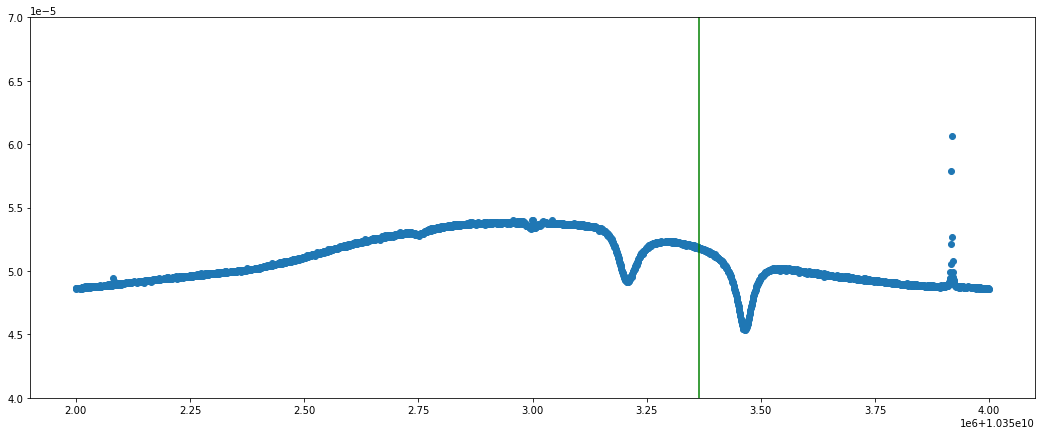

In [54]:
i=10
center = info['cavfreq'][i]

fig,ax=plt.subplots(1,1,figsize=(18,7))
ax.plot(data['freq'],data["fft{}".format(i)],'o')
ax.set_ylim([4e-5,7e-5])
ax.vlines(center,0,6,'green')
plt.show()

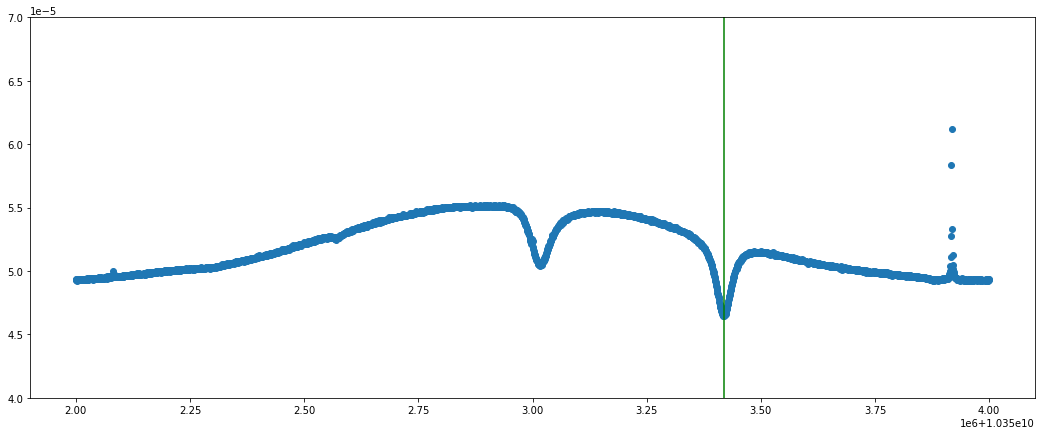

In [55]:
i=11
center = info['cavfreq'][i]

fig,ax=plt.subplots(1,1,figsize=(18,7))
ax.plot(data['freq'],data["fft{}".format(i)],'o')
ax.set_ylim([4e-5,7e-5])
ax.vlines(center,0,6,'green')
plt.show()

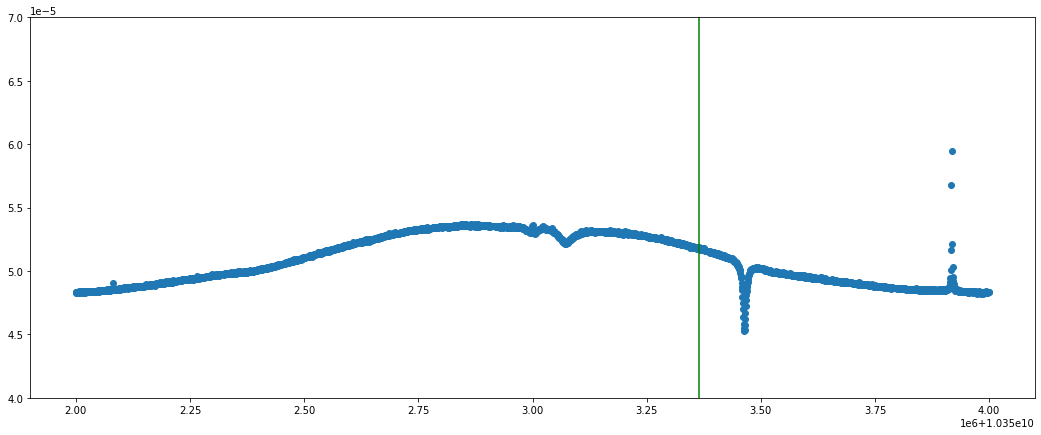

In [56]:
i=12
center = info['cavfreq'][i]

fig,ax=plt.subplots(1,1,figsize=(18,7))
ax.plot(data['freq'],data["fft{}".format(i)],'o')
ax.set_ylim([4e-5,7e-5])
ax.vlines(center,0,6,'green')
plt.show()

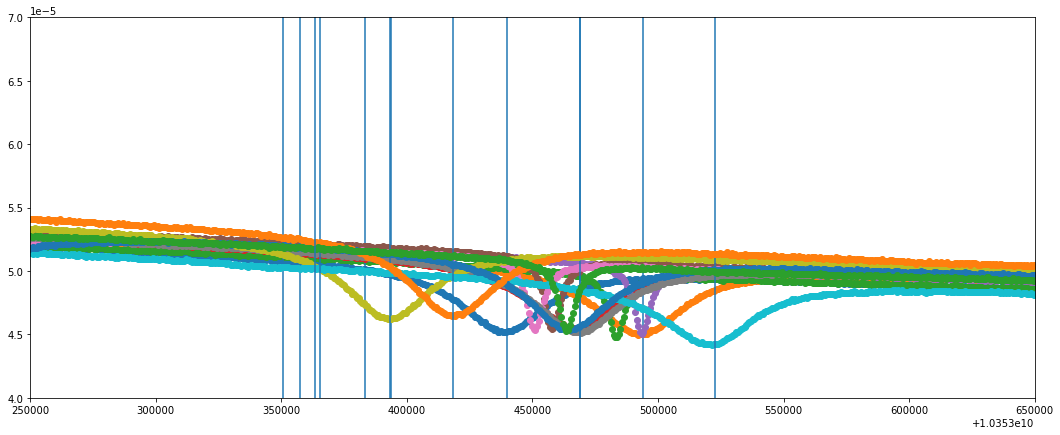

In [64]:
fig,ax=plt.subplots(1,1,figsize=(18,7))

for i in range(13):
    center = info['cavfreq'][i]
    ax.plot(data['freq'],data["fft{}".format(i)],'o')
    ax.vlines(center,0,6)
    
ax.set_ylim([4e-5,7e-5])
ax.set_xlim([3.25e6+1.035e10,3.65e6+1.035e10])
plt.show()

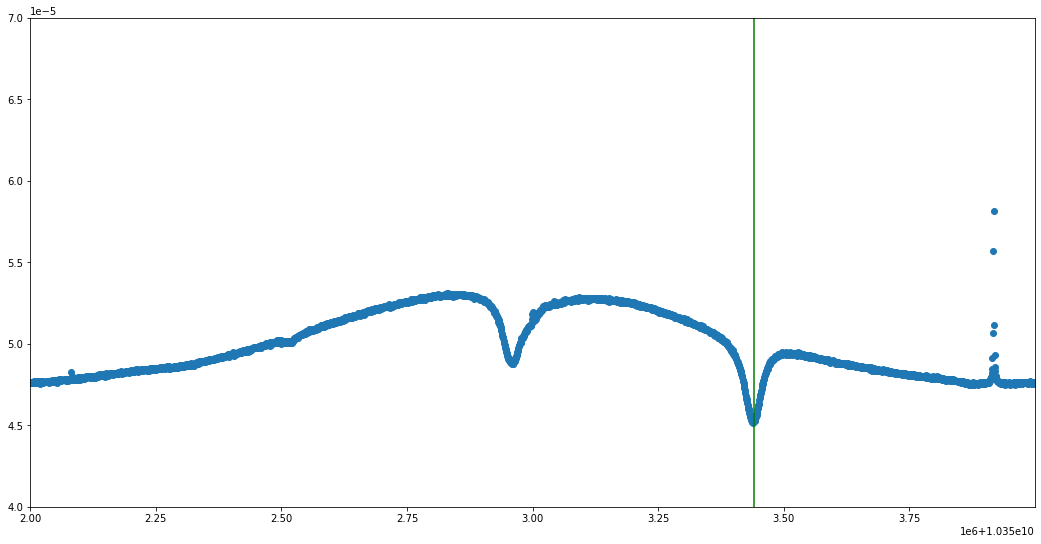

In [31]:
# Fit
def fitm(x,a,b,c,d,e,f):
    return e**2*abs(x-a+1j*b)**2/abs(x-c+1j*d)**2+f*(x-c)



# plot

i=0

fig,ax=plt.subplots(1,1,figsize=(18,9))
center = info['cavfreq'][i]
interval=data.copy()
#interval = data[(data['freq']>center-65100) & (data['freq']<center+65100)] # finestra di 200 bin ognuno da 651 Hz
    
xfreq = interval['freq']
fmin,fmax = min(xfreq),max(xfreq)
yfft=interval['fft{}'.format(i)]
   
ax.plot(xfreq,yfft,'o')
ax.vlines(center,0,6,'green')
ax.set_ylim([4e-5,7e-5])
ax.set_xlim([fmin,fmax])
    
plt.show()

In [55]:
fmodel = Model(fitm)
ps = fmodel.make_params(a=center, b=2e4, c=center,d=2.2e4,e=1e-2,f=1e-8)
ps.add('a', value=center, min=center*0.999, max=center*1.01)
ps.add('c', value=center, min=center*0.999, max=center*1.01)

result = fmodel.fit(yfft,x=xfreq, params=ps)
#dentro il fit model dovremmo mettere anche weights e convx, ma ho capito come definirli

In [56]:
result

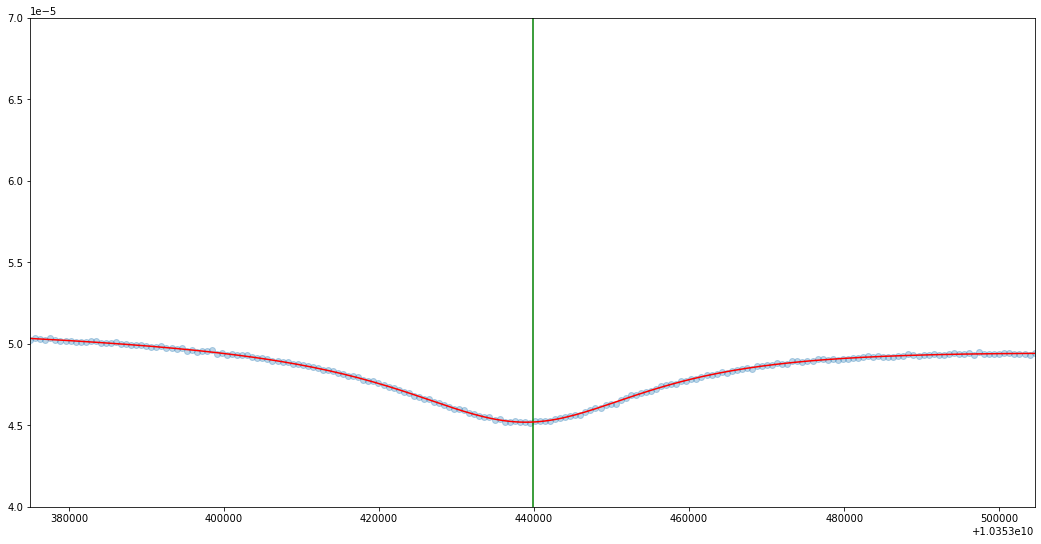

In [58]:
fig,ax=plt.subplots(1,1,figsize=(18,9))
ax.scatter(xfreq,yfft,alpha=0.3)

ax.vlines(center,0,6,'green')
ax.set_ylim([4e-5,7e-5])
ax.set_xlim([fmin,fmax])
ax.plot(xfreq,result.best_fit, label='linear model',color="red")
plt.show()